In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
## nedense başarı oranı çok düşük bir model

In [78]:
train_data = pd.read_csv("train.csv")
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [79]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [80]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [81]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

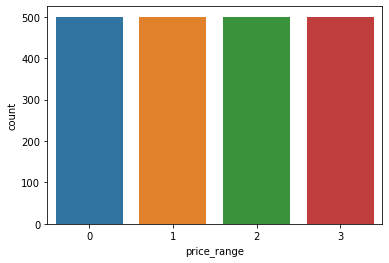

In [82]:
## plot with seaborn
sbn.countplot(x = "price_range", data = train_data)
plt.show()

In [83]:
## corr()
train_data.corr()["price_range"].sort_values

<bound method Series.sort_values of battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64>

<AxesSubplot:>

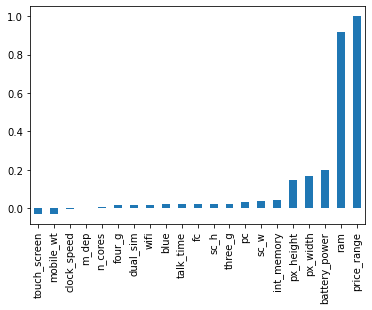

In [84]:
train_data.corr()["price_range"].sort_values().plot(kind = "bar")

In [85]:
## başarı oranı çok düşük oldugundan bazı sütunları atmayı deneyeceğim.
train_data = train_data.drop(["blue", "clock_speed", "dual_sim", "fc", "four_g", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc"], axis = 1)      

In [86]:
## independent and dependent variables
y = train_data["price_range"].values
x = train_data.drop(["price_range"], axis = 1).values

In [87]:
## train and test
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [88]:
## scaling 
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [89]:
## model
model = Sequential()

model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 10, activation = "relu"))

model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [90]:
model.fit(x = x_train, y = y_train, epochs = 500, validation_data = (x_test, y_true), verbose = 1)

Epoch 1/500
44/44 [==============================] - 1s 4ms/step - loss: 0.3495 - val_loss: -0.2991
Epoch 2/500
44/44 [==============================] - 0s 2ms/step - loss: -1.7101 - val_loss: -4.2981
Epoch 3/500
44/44 [==============================] - 0s 2ms/step - loss: -11.4974 - val_loss: -24.7694
Epoch 4/500
44/44 [==============================] - 0s 1ms/step - loss: -56.8070 - val_loss: -113.3282
Epoch 5/500
44/44 [==============================] - 0s 1ms/step - loss: -210.4773 - val_loss: -368.7436
Epoch 6/500
44/44 [==============================] - 0s 1ms/step - loss: -618.5685 - val_loss: -1013.3023
Epoch 7/500
44/44 [==============================] - 0s 1ms/step - loss: -1555.3004 - val_loss: -2416.6995
Epoch 8/500
44/44 [==============================] - 0s 1ms/step - loss: -3485.9832 - val_loss: -5036.8809
Epoch 9/500
44/44 [==============================] - 0s 1ms/step - loss: -7042.1216 - val_loss: -9719.9336
Epoch 10/500
44/44 [==============================] - 0s 1ms

44/44 [==============================] - 0s 1ms/step - loss: -195205888.0000 - val_loss: -204446480.0000
Epoch 74/500
44/44 [==============================] - 0s 1ms/step - loss: -206326496.0000 - val_loss: -216095392.0000
Epoch 75/500
44/44 [==============================] - 0s 1ms/step - loss: -217954272.0000 - val_loss: -227988912.0000
Epoch 76/500
44/44 [==============================] - 0s 1ms/step - loss: -229972400.0000 - val_loss: -240629152.0000
Epoch 77/500
44/44 [==============================] - 0s 1ms/step - loss: -242510544.0000 - val_loss: -253813152.0000
Epoch 78/500
44/44 [==============================] - 0s 1ms/step - loss: -255551472.0000 - val_loss: -267182128.0000
Epoch 79/500
44/44 [==============================] - 0s 1ms/step - loss: -269068928.0000 - val_loss: -281064000.0000
Epoch 80/500
44/44 [==============================] - 0s 1ms/step - loss: -282988064.0000 - val_loss: -295805792.0000
Epoch 81/500
44/44 [==============================] - 0s 1ms/step - l

44/44 [==============================] - 0s 2ms/step - loss: -2606049792.0000 - val_loss: -2692982784.0000
Epoch 142/500
44/44 [==============================] - 0s 2ms/step - loss: -2679046400.0000 - val_loss: -2763199488.0000
Epoch 143/500
44/44 [==============================] - 0s 2ms/step - loss: -2751273728.0000 - val_loss: -2840500480.0000
Epoch 144/500
44/44 [==============================] - 0s 2ms/step - loss: -2826452736.0000 - val_loss: -2917399296.0000
Epoch 145/500
44/44 [==============================] - 0s 2ms/step - loss: -2902423808.0000 - val_loss: -2996694016.0000
Epoch 146/500
44/44 [==============================] - 0s 2ms/step - loss: -2980874752.0000 - val_loss: -3075088384.0000
Epoch 147/500
44/44 [==============================] - 0s 2ms/step - loss: -3059717888.0000 - val_loss: -3157547520.0000
Epoch 148/500
44/44 [==============================] - 0s 2ms/step - loss: -3140415488.0000 - val_loss: -3240301568.0000
Epoch 149/500
44/44 [=========================

44/44 [==============================] - 0s 2ms/step - loss: -11554569216.0000 - val_loss: -11878174720.0000
Epoch 209/500
44/44 [==============================] - 0s 2ms/step - loss: -11767669760.0000 - val_loss: -12089947136.0000
Epoch 210/500
44/44 [==============================] - 0s 2ms/step - loss: -11982744576.0000 - val_loss: -12315947008.0000
Epoch 211/500
44/44 [==============================] - 0s 2ms/step - loss: -12202044416.0000 - val_loss: -12545058816.0000
Epoch 212/500
44/44 [==============================] - 0s 2ms/step - loss: -12426482688.0000 - val_loss: -12770117632.0000
Epoch 213/500
44/44 [==============================] - 0s 2ms/step - loss: -12651385856.0000 - val_loss: -13000484864.0000
Epoch 214/500
44/44 [==============================] - 0s 2ms/step - loss: -12880171008.0000 - val_loss: -13232458752.0000
Epoch 215/500
44/44 [==============================] - 0s 2ms/step - loss: -13110645760.0000 - val_loss: -13474004992.0000
Epoch 216/500
44/44 [=========

Epoch 275/500
44/44 [==============================] - 0s 2ms/step - loss: -33741660160.0000 - val_loss: -34610909184.0000
Epoch 276/500
44/44 [==============================] - 0s 2ms/step - loss: -34216691712.0000 - val_loss: -35097313280.0000
Epoch 277/500
44/44 [==============================] - 0s 2ms/step - loss: -34698452992.0000 - val_loss: -35590389760.0000
Epoch 278/500
44/44 [==============================] - 0s 2ms/step - loss: -35181928448.0000 - val_loss: -36091588608.0000
Epoch 279/500
44/44 [==============================] - 0s 2ms/step - loss: -35674451968.0000 - val_loss: -36591493120.0000
Epoch 280/500
44/44 [==============================] - 0s 2ms/step - loss: -36172075008.0000 - val_loss: -37093306368.0000
Epoch 281/500
44/44 [==============================] - 0s 2ms/step - loss: -36675813376.0000 - val_loss: -37597687808.0000
Epoch 282/500
44/44 [==============================] - 0s 2ms/step - loss: -37175996416.0000 - val_loss: -38140010496.0000
Epoch 283/500
44

44/44 [==============================] - 0s 1ms/step - loss: -77884375040.0000 - val_loss: -79780159488.0000
Epoch 342/500
44/44 [==============================] - 0s 1ms/step - loss: -78784667648.0000 - val_loss: -80693944320.0000
Epoch 343/500
44/44 [==============================] - 0s 1ms/step - loss: -79690489856.0000 - val_loss: -81624711168.0000
Epoch 344/500
44/44 [==============================] - 0s 1ms/step - loss: -80601866240.0000 - val_loss: -82579374080.0000
Epoch 345/500
44/44 [==============================] - 0s 2ms/step - loss: -81531936768.0000 - val_loss: -83522912256.0000
Epoch 346/500
44/44 [==============================] - 0s 1ms/step - loss: -82463752192.0000 - val_loss: -84472258560.0000
Epoch 347/500
44/44 [==============================] - 0s 1ms/step - loss: -83404906496.0000 - val_loss: -85417345024.0000
Epoch 348/500
44/44 [==============================] - 0s 1ms/step - loss: -84344053760.0000 - val_loss: -86397829120.0000
Epoch 349/500
44/44 [=========

44/44 [==============================] - 0s 1ms/step - loss: -156452634624.0000 - val_loss: -160127893504.0000
Epoch 408/500
44/44 [==============================] - 0s 1ms/step - loss: -157997105152.0000 - val_loss: -161653014528.0000
Epoch 409/500
44/44 [==============================] - 0s 1ms/step - loss: -159526682624.0000 - val_loss: -163252174848.0000
Epoch 410/500
44/44 [==============================] - 0s 1ms/step - loss: -161087111168.0000 - val_loss: -164851875840.0000
Epoch 411/500
44/44 [==============================] - 0s 1ms/step - loss: -162650308608.0000 - val_loss: -166464258048.0000
Epoch 412/500
44/44 [==============================] - 0s 1ms/step - loss: -164232183808.0000 - val_loss: -168080883712.0000
Epoch 413/500
44/44 [==============================] - 0s 1ms/step - loss: -165817729024.0000 - val_loss: -169708847104.0000
Epoch 414/500
44/44 [==============================] - 0s 2ms/step - loss: -167422230528.0000 - val_loss: -171339939840.0000
Epoch 415/500


44/44 [==============================] - 0s 1ms/step - loss: -282972127232.0000 - val_loss: -289434730496.0000
Epoch 473/500
44/44 [==============================] - 0s 1ms/step - loss: -285421273088.0000 - val_loss: -291899572224.0000
Epoch 474/500
44/44 [==============================] - 0s 2ms/step - loss: -287852822528.0000 - val_loss: -294353371136.0000
Epoch 475/500
44/44 [==============================] - 0s 1ms/step - loss: -290289418240.0000 - val_loss: -296906326016.0000
Epoch 476/500
44/44 [==============================] - 0s 1ms/step - loss: -292777492480.0000 - val_loss: -299413241856.0000
Epoch 477/500
44/44 [==============================] - 0s 1ms/step - loss: -295262552064.0000 - val_loss: -301932118016.0000
Epoch 478/500
44/44 [==============================] - 0s 1ms/step - loss: -297770450944.0000 - val_loss: -304476225536.0000
Epoch 479/500
44/44 [==============================] - 0s 2ms/step - loss: -300278611968.0000 - val_loss: -307092455424.0000
Epoch 480/500


<AxesSubplot:>

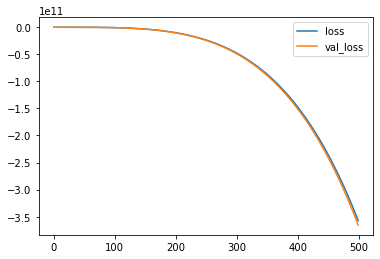

In [91]:
loss_model = pd.DataFrame(model.history.history)
loss_model.plot()

In [92]:
y_pred1 = (model2.predict(x_test) > 0.5).astype("int32")
acc1 = accuracy_score(y_true, y_pred1)
acc1 * 100

19/19 [==============================] - 0s 665us/step


25.0

In [93]:
## model 2
model2 = Sequential()

model2.add(Dense(units = 10, activation = "relu"))
model2.add(Dropout(0.6))

model2.add(Dense(units = 5, activation = "relu"))
model2.add(Dropout(0.6))

model2.add(Dense(units = 5, activation = "relu"))
model2.add(Dropout(0.6))

#model2.add(Dense(units = 10, activation = "relu"))
#model2.add(Dropout(0.2))

model2.add(Dense(units = 1, activation = "sigmoid"))

#model2.compile(loss = "binary_crossentropy", optimizer = "adam")
model2.compile(loss = "mse", optimizer = "rmsprop")

In [94]:
early_stopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25)

In [95]:
model2.fit(x = x_train, y = y_train, epochs = 50, validation_data = (x_test, y_true), verbose = 1, callbacks = [early_stopping])

Epoch 1/50
44/44 [==============================] - 1s 4ms/step - loss: 2.3089 - val_loss: 2.2112
Epoch 2/50
44/44 [==============================] - 0s 1ms/step - loss: 2.2272 - val_loss: 2.1562
Epoch 3/50
44/44 [==============================] - 0s 1ms/step - loss: 2.1673 - val_loss: 2.1123
Epoch 4/50
44/44 [==============================] - 0s 1ms/step - loss: 2.1287 - val_loss: 2.0659
Epoch 5/50
44/44 [==============================] - 0s 1ms/step - loss: 2.0832 - val_loss: 2.0094
Epoch 6/50
44/44 [==============================] - 0s 2ms/step - loss: 2.0206 - val_loss: 1.9361
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 1.9732 - val_loss: 1.8562
Epoch 8/50
44/44 [==============================] - 0s 2ms/step - loss: 1.9070 - val_loss: 1.7735
Epoch 9/50
44/44 [==============================] - 0s 1ms/step - loss: 1.8631 - val_loss: 1.6994
Epoch 10/50
44/44 [==============================] - 0s 1ms/step - loss: 1.8147 - val_loss: 1.6318
Epoch 11/50
44/44 [

<AxesSubplot:>

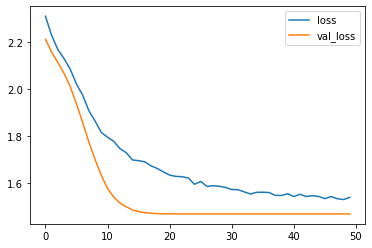

In [96]:
loss_model2 = pd.DataFrame(model2.history.history)
loss_model2.plot()

In [97]:
y_pred = (model2.predict(x_test) > 0.5).astype("int32")


19/19 [==============================] - 0s 698us/step


In [98]:
cnf = confusion_matrix(y_true, y_pred)
cnf

array([[  0, 140,   0,   0],
       [  0, 157,   0,   0],
       [  0, 157,   0,   0],
       [  0, 146,   0,   0]], dtype=int64)

In [99]:
acc = accuracy_score(y_true, y_pred)
acc * 100

26.166666666666664